In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sea

In [35]:
import sklearn

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('best-selling-manga.csv')

In [3]:
df.head(5)

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71


In [4]:
df.isnull().sum()

Manga series                              0
Author(s)                                 0
Publisher                                 0
Demographic                               0
No. of collected volumes                  0
Serialized                                0
Approximate sales in million(s)           0
Average sales per volume in million(s)    0
dtype: int64

In [ ]:
#no missing values, an issue that I experienced in the group project so this time I wanted a dataset that would be easier to manage nas

In [5]:
#Since the serialized collumn is not functional as it stands now, I will create 3 new collumns based out of it and then delete the collumn.

In [6]:
def newcols(Serialized):
    if 'present' in Serialized:
        return 'Ongoing'
    elif 'on hiatus' in Serialized:
        return 'On Hiatus'
    else:
        return 'Finalized'
    
df['Status'] = df['Serialized'].apply(newcols)
df['Status'] = pd.Categorical(df['Status'], categories=['Ongoing', 'On Hiatus', 'Finalized'], ordered=True)

In [7]:
df.head(5)

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s),Status
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97,Ongoing
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45,Ongoing
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65,Ongoing
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19,Finalized
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71,Finalized


In [8]:
df['Ongoing'] = df['Status'] == 'Ongoing'
df['OnHiatus'] = df['Status'] == 'On Hiatus'
df['Finalized'] = df['Status'] == 'Finalized'

In [9]:
df.head(10)

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s),Status,Ongoing,OnHiatus,Finalized
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97,Ongoing,True,False,False
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45,Ongoing,True,False,False
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65,Ongoing,True,False,False
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19,Finalized,False,False,True
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71,Finalized,False,False,True
5,Naruto,Masashi Kishimoto,Shueisha,Shōnen,72,1999–2014,250.0,3.47,Finalized,False,False,True
6,Slam Dunk,Takehiko Inoue,Shueisha,Shōnen,31,1990–1996,170.0,5.48,Finalized,False,False,True
7,KochiKame: Tokyo Beat Cops,Osamu Akimoto,Shueisha,Shōnen,201,1976–2016,156.5,0.78,Finalized,False,False,True
8,Demon Slayer: Kimetsu no Yaiba,Koyoharu Gotouge,Shueisha,Shōnen,23,2016–2020,150.0,6.52,Finalized,False,False,True
9,Oishinbo,"Tetsu Kariya, Akira Hanasaki",Shogakukan,Seinen,111,1983–2014 (on hiatus),135.0,1.22,On Hiatus,False,True,False


In [10]:
dontmove = [col for col in df.columns if col != 'Approximate sales in million(s)']

df = df[dontmove + ['Approximate sales in million(s)']]

In [11]:
df.head(10)

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Average sales per volume in million(s),Status,Ongoing,OnHiatus,Finalized,Approximate sales in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,4.97,Ongoing,True,False,False,516.6
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,1.45,Ongoing,True,False,False,300.0
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,2.65,Ongoing,True,False,False,270.0
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,6.19,Finalized,False,False,True,260.0
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,4.71,Finalized,False,False,True,250.0
5,Naruto,Masashi Kishimoto,Shueisha,Shōnen,72,1999–2014,3.47,Finalized,False,False,True,250.0
6,Slam Dunk,Takehiko Inoue,Shueisha,Shōnen,31,1990–1996,5.48,Finalized,False,False,True,170.0
7,KochiKame: Tokyo Beat Cops,Osamu Akimoto,Shueisha,Shōnen,201,1976–2016,0.78,Finalized,False,False,True,156.5
8,Demon Slayer: Kimetsu no Yaiba,Koyoharu Gotouge,Shueisha,Shōnen,23,2016–2020,6.52,Finalized,False,False,True,150.0
9,Oishinbo,"Tetsu Kariya, Akira Hanasaki",Shogakukan,Seinen,111,1983–2014 (on hiatus),1.22,On Hiatus,False,True,False,135.0


In [12]:
#Demographic knowledge:
#Shonen: Manga targeted at tween and teen boys
#Shojo: Manga targeted at tween and teen girls
#Seinen: Manga targeted at adult men (18+)
#Josei: Manga targeted at adult women (18+)
#Children: MaNGA target at children

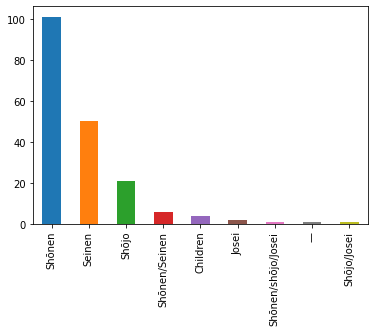

In [13]:
df['Demographic'].value_counts().plot(kind='bar')

In [14]:
#Shounen is the most popular demographic amoung the manga-best-sellers.

In [15]:
#There is a combinmation in genres sometimes, lets get rid of that into a new category

In [16]:
print(df["Demographic"].unique())

['Shōnen' 'Seinen' 'Children' 'Shōnen/Seinen' '—' 'Shōjo' 'Josei'
 'Shōjo/Josei' 'Shōnen/shōjo/Josei']


In [17]:
df["Demographic"]=df["Demographic"].replace("Shōnen/shōjo/Josei" , "Multi")
df["Demographic"]=df["Demographic"].replace("Shōjo/Josei" , "Multi")
df["Demographic"]=df["Demographic"].replace("—" , "Multi")
df["Demographic"]=df["Demographic"].replace("Shōnen/Seinen" , "Multi")

In [18]:
df["Demographic"].value_counts()

Shōnen      101
Seinen       50
Shōjo        21
Multi         9
Children      4
Josei         2
Name: Demographic, dtype: int64

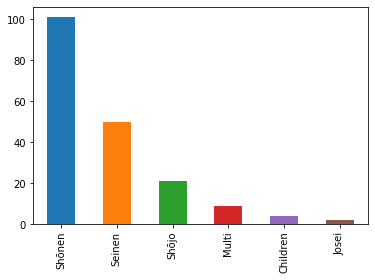

In [19]:
df['Demographic'].value_counts().plot(kind='bar')

In [20]:
df["Author(s)"].value_counts()

Rumiko Takahashi                                                  4
Osamu Tezuka                                                      3
Mitsuru Adachi                                                    3
Naoki Urasawa                                                     3
Tsukasa Hojo                                                      3
Yoshihiro Togashi                                                 2
Shuichi Shigeno                                                   2
Takehiko Inoue                                                    2
Hiro Mashima                                                      2
Ken Akamatsu                                                      2
Clamp                                                             2
Akira Toriyama                                                    2
Masanori Morita                                                   2
Tooru Fujisawa                                                    2
Shinji Mizushima                                

In [21]:
#there does not seem to be a lot authors that repeat in the best-selling-manga data.

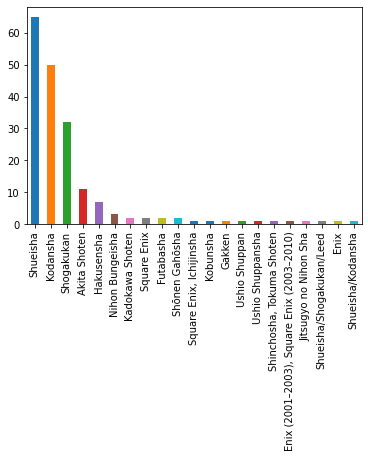

In [22]:
df["Publisher"].value_counts().plot(kind='bar')

In [23]:
df["Publisher"].value_counts()

Shueisha                                     65
Kodansha                                     50
Shogakukan                                   32
Akita Shoten                                 11
Hakusensha                                    7
Nihon Bungeisha                               3
Kadokawa Shoten                               2
Square Enix                                   2
Futabasha                                     2
Shōnen Gahōsha                                2
Square Enix, Ichijinsha                       1
Kobunsha                                      1
Gakken                                        1
Ushio Shuppan                                 1
Ushio Shuppansha                              1
Shinchosha, Tokuma Shoten                     1
Enix (2001–2003), Square Enix (2003–2010)     1
Jitsugyo no Nihon Sha                         1
Shueisha/Shogakukan/Leed                      1
Enix                                          1
Shueisha/Kodansha                       

In [24]:
#Shueisha clearly is the most frequest publisher for the best-selling-manga.

In [25]:
df["Publisher"] = df["Publisher"].replace(["Enix (2001–2003), Square Enix (2003–2010)", "Enix", "Square Enix"], "Square Enix")
#combine them to make graphs better
df["Publisher"].value_counts()

Shueisha                     65
Kodansha                     50
Shogakukan                   32
Akita Shoten                 11
Hakusensha                    7
Square Enix                   4
Nihon Bungeisha               3
Kadokawa Shoten               2
Shōnen Gahōsha                2
Futabasha                     2
Shinchosha, Tokuma Shoten     1
Shueisha/Kodansha             1
Ushio Shuppansha              1
Ushio Shuppan                 1
Kobunsha                      1
Square Enix, Ichijinsha       1
Gakken                        1
Jitsugyo no Nihon Sha         1
Shueisha/Shogakukan/Leed      1
Name: Publisher, dtype: int64

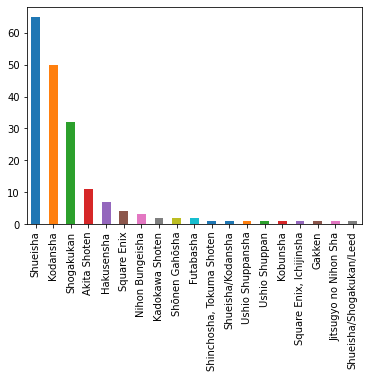

In [26]:
df["Publisher"].value_counts().plot(kind='bar')

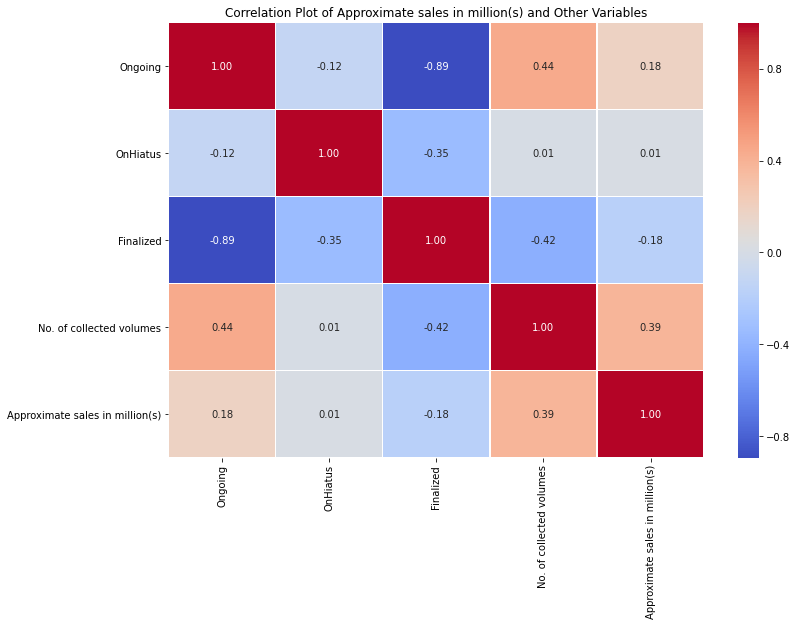

In [27]:
tft = ['Ongoing', 'OnHiatus', 'Finalized', 'No. of collected volumes', 'Approximate sales in million(s)']
df2 = df[tft]
heatmap = df2.corr()

plt.figure(figsize=(12, 8))
sea.heatmap(heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Plot of Approximate sales in million(s) and Other Variables')
plt.show()

In [28]:
#well, obviously there is a negative relaqtionship corelation between Ongoing and Finalized.
#Aside from that no significant correlation between these variables.
#No. of collected volumes and Approx. sales in millions are somewhat correlated.
#Which makes sense, as that was one of my assumptions of the model, the more volumes the more sales a manga would have.

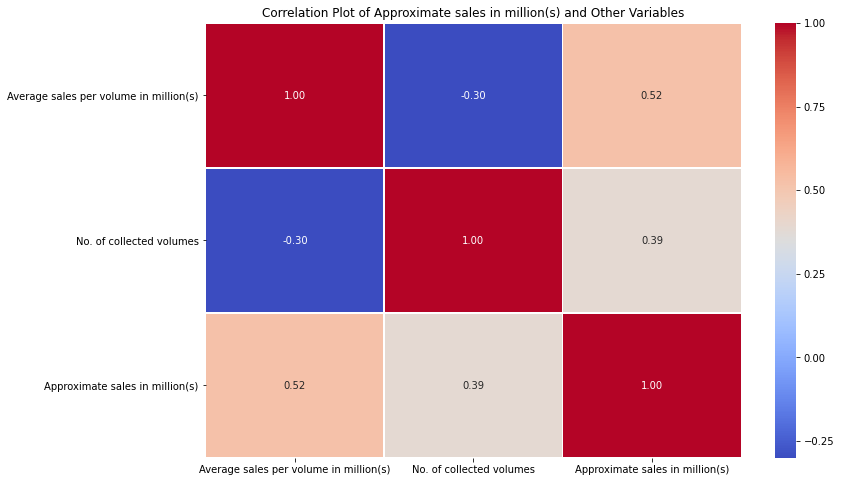

In [29]:
dfnewcategoricals = pd.get_dummies(df, columns=['Demographic'], drop_first=True)
remix = ['Average sales per volume in million(s)','No. of collected volumes', 'Approximate sales in million(s)']
df3 = df[remix]
heatmap = df3.corr()

plt.figure(figsize=(12, 8))
sea.heatmap(heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Plot of Approximate sales in million(s) and Other Variables')
plt.show()

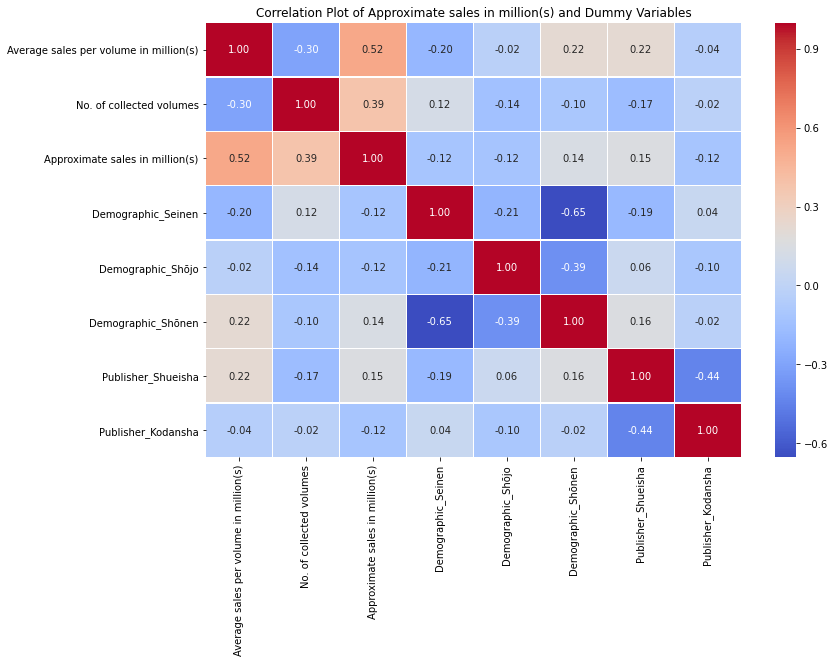

In [30]:
dfnewcategoricals = pd.get_dummies(df, columns=['Demographic', 'Publisher'], drop_first=True)
dummies = ['Demographic_Seinen', 'Demographic_Shōjo', 'Demographic_Shōnen', 'Publisher_Shueisha', 'Publisher_Kodansha']
#chose these becasue they are the biggest demographic and publishers by a good margin so they might  be more likely of a relationship since more data to pull that from.
remix = ['Average sales per volume in million(s)', 'No. of collected volumes', 'Approximate sales in million(s)']
#I wanted to be sure about my original assumption of No. of collected volumes and sales relationships, so maybe one of the genres could be related to that variable.
df3 = pd.concat([df[remix], dfnewcategoricals[dummies]], axis=1)
heatmap = df3.corr()

plt.figure(figsize=(12, 8))
sea.heatmap(heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Plot of Approximate sales in million(s) and Dummy Variables')
plt.show()

In [31]:
#Publisher and Demographic does not seem to have a correlation with sales in millions.

In [32]:
df.head(5)

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Average sales per volume in million(s),Status,Ongoing,OnHiatus,Finalized,Approximate sales in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,4.97,Ongoing,True,False,False,516.6
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,1.45,Ongoing,True,False,False,300.0
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,2.65,Ongoing,True,False,False,270.0
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,6.19,Finalized,False,False,True,260.0
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,4.71,Finalized,False,False,True,250.0


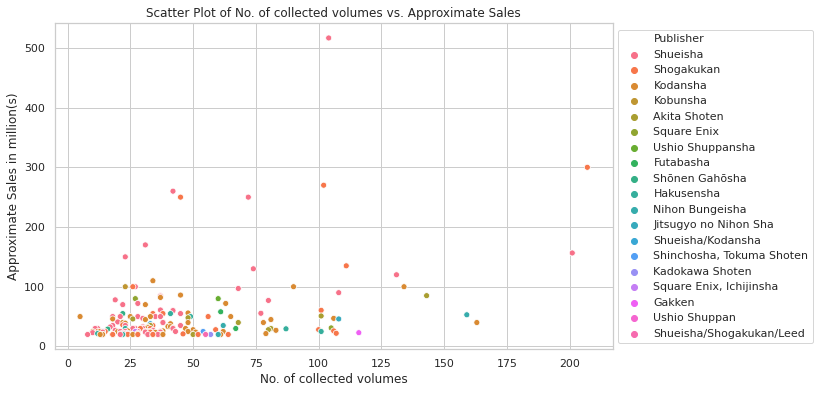

In [33]:
sea.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sea.scatterplot(data=df, x="No. of collected volumes", y="Approximate sales in million(s)", hue="Publisher")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title("Scatter Plot of No. of collected volumes vs. Approximate Sales")
plt.xlabel("No. of collected volumes")
plt.ylabel("Approximate Sales in million(s)")
plt.show()

In [34]:
#there isnt really a relationship or a trend line between no. of collected volumes and sales in millions

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 12 columns):
Manga series                              187 non-null object
Author(s)                                 187 non-null object
Publisher                                 187 non-null object
Demographic                               187 non-null object
No. of collected volumes                  187 non-null int64
Serialized                                187 non-null object
Average sales per volume in million(s)    187 non-null float64
Status                                    187 non-null category
Ongoing                                   187 non-null bool
OnHiatus                                  187 non-null bool
Finalized                                 187 non-null bool
Approximate sales in million(s)           187 non-null float64
dtypes: bool(3), category(1), float64(2), int64(1), object(5)
memory usage: 12.6+ KB


In [38]:
#Since Approximate sales in million(s) AND Average sales per volume in million(s) do not have a stronmg corrrelation it can still be used for the glm model.

In [63]:
dfnewcategoricals = pd.get_dummies(df, columns=['Demographic'], drop_first=True)
x = dfnewcategoricals.drop(['Manga series', 'Author(s)', 'Serialized', 'Publisher', 'Status', 'Finalized', 'Ongoing', 'OnHiatus', 'Approximate sales in million(s)'], axis=1)
y = df['Approximate sales in million(s)']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=100)

mod = LinearRegression()
mod.fit(xtrain, ytrain)
ypred = mod.predict(xtest)

tft = mean_squared_error(ytest, ypred)
kda = r2_score(ytest, ypred)

print(f'Mean Squared Error (MSE): {tft}')
print(f'R-squared (R2): {kda}')

Mean Squared Error (MSE): 713.5822034712754
R-squared (R2): 0.625425628943044


In [58]:
print(xtrain.dtypes)
print(ytrain.dtypes)

No. of collected volumes                    int64
Average sales per volume in million(s)    float64
Demographic_Josei                           uint8
Demographic_Multi                           uint8
Demographic_Seinen                          uint8
Demographic_Shōjo                           uint8
Demographic_Shōnen                          uint8
dtype: object
float64


In [43]:
df.head(5)

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Average sales per volume in million(s),Status,Ongoing,OnHiatus,Finalized,Approximate sales in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,4.97,Ongoing,True,False,False,516.6
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,1.45,Ongoing,True,False,False,300.0
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,2.65,Ongoing,True,False,False,270.0
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,6.19,Finalized,False,False,True,260.0
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,4.71,Finalized,False,False,True,250.0


In [64]:
x = df.drop(['Manga series', 'Demographic', 'Author(s)', 'Serialized', 'Publisher', 'Status', 'Finalized', 'Ongoing', 'OnHiatus', 'Approximate sales in million(s)'], axis=1)
y = df['Approximate sales in million(s)']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

m = LinearRegression()
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)

tft = mean_squared_error(ytest, ypred)
kda = r2_score(ytest, ypred)

print(f'Mean Squared Error: {tft}')
print(f'R-squared: {kda}')

Mean Squared Error: 881.754807511519
R-squared: 0.7184847536413556


In [65]:
#it seems Average sales per volume in million(s) and No. of collected volumes are the best feature variables for a linear model for approximate sales in milliuons, but even then they are not ideal. Since the R-squared is still just 61%-73%. There is a big random depending on the randomization.
#when adding publisher, status and demographic it drops the prediction slightly to around 58%
#Because of that it is best to run the model with the two current variables, this way we are certain we are not overfitting our model since the current variable and features are not significantly correlated nor a huge amount.

In [ ]:
#If I had to redo this project I would actually change my chosen dataset for something with more rows.
#I attempted to do a Random Forest model to answer the question "Can we predict what would be the best selling Publisher?" since I am already very familiar with it from other data classes, however it does seem that it is much less intuitive on pyhton. So, ifd I had more time on this project or more assistance instead of opting from changing the dataset I would do a naive bayes model and a random forest model. 